In [2]:
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv('students-score-results.csv')

In [5]:
df.head()

,index,cgpa,iq,placement
0,0,6.9,118,1
1,1,5.8,95,0
2,2,7.2,124,1
3,3,6.4,108,0
4,4,8.1,135,1


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      200 non-null    int64  
 1   cgpa       200 non-null    float64
 2   iq         200 non-null    int64  
 3   placement  200 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [18]:
df = df.iloc[:,1:] # 0.1 Preprocessing

In [19]:
df.head()

,cgpa,iq,placement
0,6.9,118,1
1,5.8,95,0
2,7.2,124,1
3,6.4,108,0
4,8.1,135,1


In [20]:
# 0.1 EDA n feAture Selection
import matplotlib.pyplot as plt

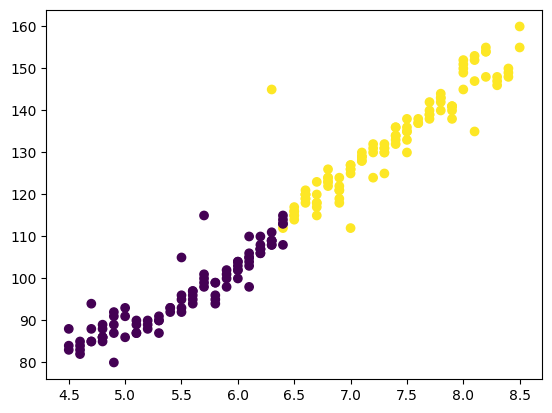

In [21]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [22]:
X = df.iloc[:,0:2] # 1. Extracting input and output colmn
y = df.iloc[:,-1]

In [23]:
#  Train test split
X 

,cgpa,iq
0,6.9,118
1,5.8,95
2,7.2,124
3,6.4,108
4,8.1,135
...,...,...
195,7.9,141
196,6.6,120
197,5.5,93
198,7.3,130


In [24]:
y

0      1
1      0
2      1
3      0
4      1
      ..
195    1
196    1
197    0
198    1
199    0
Name: placement, Length: 200, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X_train

,cgpa,iq
88,4.8,89
99,6.1,105
15,4.8,85
98,7.4,134
129,8.0,150
...,...,...
46,6.7,123
91,5.4,93
110,5.8,99
136,6.1,110


In [26]:
y_train

88     0
99     0
15     0
98     1
129    1
      ..
46     1
91     0
110    0
136    0
128    0
Name: placement, Length: 180, dtype: int64

In [27]:
X_test

,cgpa,iq
73,5.9,98
78,6.2,108
69,4.5,83
193,6.2,106
68,6.1,106
89,8.0,151
198,7.3,130
12,7.8,140
163,4.7,88
167,7.3,131


In [28]:
# 2. Scale the values
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()   

X_train = scaler.fit_transform(X_train)
X_train

array([[-1.5668817 , -1.27210455],
       [-0.36435524, -0.50836448],
       [-1.5668817 , -1.46303957],
       [ 0.83817122,  0.87591439],
       [ 1.39318343,  1.63965446],
       [-1.28937559, -1.36757206],
       [-0.17935117, -0.36516322],
       [ 0.46816308,  0.54177811],
       [-0.17935117, -0.22196196],
       [-0.54935931, -0.74703325],
       [-0.17935117, -0.36516322],
       [-1.47437966, -1.70170834],
       [ 1.39318343,  1.5919207 ],
       [ 1.02317529,  1.06684941],
       [-1.10437152, -1.36757206],
       [-1.5668817 , -1.31983831],
       [-1.10437152, -1.17663704],
       [ 1.30068139,  1.21005067],
       [ 1.30068139,  1.16231692],
       [ 0.46816308,  0.49404436],
       [ 0.83817122,  0.9713819 ],
       [-0.08684913, -0.03102694],
       [ 1.5781875 ,  1.83058948],
       [ 0.28315901,  0.39857685],
       [ 0.19065697,  0.20764183],
       [-1.38187763, -1.17663704],
       [ 0.37566104,  0.25537559],
       [-1.38187763, -1.41530581],
       [ 0.28315901,

In [29]:
X_test = scaler.transform(X_test)  
X_test

array([[-0.54935931, -0.84250076],
       [-0.2718532 , -0.36516322],
       [-1.8443878 , -1.55850708],
       [-0.2718532 , -0.46063073],
       [-0.36435524, -0.46063073],
       [ 1.39318343,  1.68738821],
       [ 0.74566918,  0.68497937],
       [ 1.20817936,  1.16231692],
       [-1.65938373, -1.31983831],
       [ 0.74566918,  0.73271313],
       [ 0.74566918,  0.78044688],
       [-0.17935117, -0.31742947],
       [ 0.65316715,  0.73271313],
       [-0.17935117, -0.31742947],
       [-1.65938373, -1.46303957],
       [-0.45685727, -0.74703325],
       [ 0.65316715,  0.78044688],
       [ 1.20817936,  1.30551818],
       [ 0.56066511,  0.63724562],
       [ 0.56066511,  0.63724562]])

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()   

# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Evaluate the model/model selection
y_pred = clf.predict(X_test)

y_test

73     0
78     0
69     0
193    0
68     0
89     1
198    1
12     1
163    0
167    1
83     1
155    0
67     1
93     0
79     0
27     0
183    1
86     1
189    1
54     1
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score 

accuracy_score(y_test,y_pred)

1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


<Axes: >

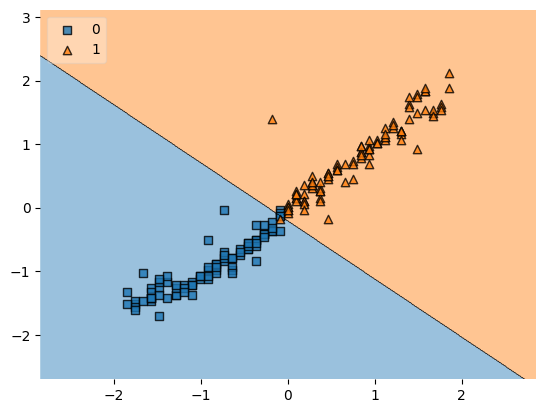

In [35]:

!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
# Deploy
import pickle
     
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
# Steps
# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model